# Server Hack Prediction

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Filling missing values](#section401)<br>
  - 4.2 [Transforming date columns](#section402)<br>
  - 4.3 [Removing highly Correlated Columns](#section403)<br>
  - 4.4 [Pandas Profiling after Data Preprocessing](#section404)<br>
  - 4.5 [Exploratory Data Analysis](#section405)<br>
5. [Data preparation for model building](#section5)<br>
  - 5.1 [Standardizing continuos independent variables](#section501)<br>
  - 5.2 [Applying SMOTING for imbalanced data](#section502)<br>
  - 5.3 [Segregating Train and Test data](#section503)<br>
6. [Ensemble Modelling and Prediction](#section6)<br>  
  - 6.1 [Linear Regression](#section601)
  - 6.2 [Random Forest](#section602) 
  - 6.3 [KNN](#section603)
  - 6.4 [Naive Bayes](#section604)
  - 6.5 [SVM](#section605)     
7.  [Conclusion](#section7)<br>
    

<a id=section1></a>
# 1. Problem Statement


**Predict if the server will be hacked.**

All the countries across the globe have adapted to means of digital payments. And with the increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your phone number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen. 

Your work is to build a predictive model which can identify a pattern in these variables and suggest that a hack is going to happen so that the cyber security can somehow stop it before it actually happens. You have to predict the column : "MALICIOUS_OFFENSE".

Hackathon link: https://www.hackerearth.com/challenges/hiring/novartis-data-science-hiring-challenge/

<a id=section2></a>
# 2. Importing Packages

In [ ]:
import numpy as np                     

import pandas as pd

# To suppress pandas warnings.
pd.set_option('mode.chained_assignment', None) 

# To display all the data in each column
pd.set_option('display.max_colwidth', -1)         

pd.get_option("display.max_rows",10000)

# To display every column of the dataset in head()
pd.options.display.max_columns = 100               

import warnings
warnings.filterwarnings('ignore')    

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# To apply seaborn styles to the plots.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

<a id=section3></a>
# 3. Loading Data

In [3]:
df_train  = pd.read_csv('Train.csv', index_col='INCIDENT_ID')
df_test = pd.read_csv('Test.csv', index_col='INCIDENT_ID')

<a id=section301></a>
## 3.1 Description of the Datasets

#### a. Check shape

In [4]:
df_train.shape, df_test.shape

((23856, 17), (15903, 16))

#### b. info

**Input Variables:**


1.  INCIDENT_ID: Unique Identifier for an incident log.
2.  DATE: Date wof incident occurence.
3.  X_1-X_15: Anonymized logging parameters.

**Output Variables:**

1.  MULTIPLE_OFFENSE: Indicates if the incident was a hack.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23856 entries, CR_102659 to CR_22575
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23856 non-null  object 
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23674 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15903 entries, CR_195453 to CR_33545
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    15903 non-null  object 
 1   X_1     15903 non-null  int64  
 2   X_2     15903 non-null  int64  
 3   X_3     15903 non-null  int64  
 4   X_4     15903 non-null  int64  
 5   X_5     15903 non-null  int64  
 6   X_6     15903 non-null  int64  
 7   X_7     15903 non-null  int64  
 8   X_8     15903 non-null  int64  
 9   X_9     15903 non-null  int64  
 10  X_10    15903 non-null  int64  
 11  X_11    15903 non-null  int64  
 12  X_12    15776 non-null  float64
 13  X_13    15903 non-null  int64  
 14  X_14    15903 non-null  int64  
 15  X_15    15903 non-null  int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 2.1+ MB


**Observations :**  

We have missing values for **X_12**.

#### c. describe

In [7]:
df_train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [8]:
df_test.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15776.000000,15903.000000,15903.000000,15903.000000
mean,0.468088,24.722631,24.575049,4.284223,2.448469,6.084890,4.862605,0.986732,4.908759,1.241212,206.954097,0.972236,85.191096,72.218575,33.422625
std,1.412112,15.228841,15.127451,2.974584,1.963372,4.451117,3.854550,1.471274,1.374677,0.841804,93.107783,0.876669,27.493192,43.438227,8.314284
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,50.000000,6.000000,40.000000,332.000000,40.000000,117.000000,142.000000,50.000000


**Observations :** Looks like there are some outliers. Let's confirm same from pandas profiling in next step.


 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [9]:
# To install pandas profiling please run this command.

#!pip install folium==0.2.1
#!pip install pandas-profiling --upgrade

In [10]:
from pandas_profiling import ProfileReport

# Running pandas profiling to get better understanding of data

#profile =  ProfileReport(df_train, title='Pandas Profiling Report of train data before data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="train_report_before_processing.html")

In [11]:
#profile =  ProfileReport(df_train, title='Pandas Profiling Report of test data before data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="test_report_before_processing.html")

 <a id=section4></a>
# 4. Data Preprocessing

 <a id=section401></a>
 
## 4.1 Filling missing values

In [12]:
df_train.isnull().sum()

DATE                0  
X_1                 0  
X_2                 0  
X_3                 0  
X_4                 0  
X_5                 0  
X_6                 0  
X_7                 0  
X_8                 0  
X_9                 0  
X_10                0  
X_11                0  
X_12                182
X_13                0  
X_14                0  
X_15                0  
MULTIPLE_OFFENSE    0  
dtype: int64

**NOTE:**
X_12 has missing values and we shall replace them with the mode.

In [13]:
df_train['X_12'].nunique()

23

**NOTE :**

As there are only 23 unique values, we can safely assume X_12 as categorical column. Let's fill it with mode for both train ans test data.


In [14]:
df_train['X_12'].fillna(df_train['X_12'].mode()[0], inplace=True)

In [15]:
df_train['X_12'].isnull().sum()

0

In [16]:
df_test.isnull().sum()

DATE    0  
X_1     0  
X_2     0  
X_3     0  
X_4     0  
X_5     0  
X_6     0  
X_7     0  
X_8     0  
X_9     0  
X_10    0  
X_11    0  
X_12    127
X_13    0  
X_14    0  
X_15    0  
dtype: int64

In [17]:
df_test['X_12'].fillna(df_test['X_12'].mode()[0], inplace=True)

In [18]:
df_test['X_12'].isnull().sum()

0

 <a id=section402></a>
 
## 4.2 Transforming date columns

### a. Converting DATE to pandas datetime.

#### Train

In [19]:
df_train['DATE'] = pd.to_datetime(df_train['DATE'] , errors = 'coerce', utc = True)

In [20]:
df_train['DATE'].dtypes

datetime64[ns, UTC]

#### Test

In [21]:
df_test['DATE'] = pd.to_datetime(df_test['DATE'] , errors = 'coerce', utc = True)

In [22]:
df_test['DATE'].dtypes

datetime64[ns, UTC]

### b. Feature extraction from DATE column

#### Train

In [23]:
df_train['YEAR'] = df_train['DATE'].dt.year

df_train['MONTH'] = df_train['DATE'].dt.month

df_train['DAY'] = df_train['DATE'].dt.day

In [24]:
# drop DATE  columns
df_train.drop(['DATE'], axis=1, inplace=True)

#### Test

In [25]:
df_test['YEAR'] = df_test['DATE'].dt.year

df_test['MONTH'] = df_test['DATE'].dt.month

df_test['DAY'] = df_test['DATE'].dt.day

In [26]:
# drop DATE  columns
df_test.drop(['DATE'], axis=1, inplace=True)

 <a id=section403></a>
## 4.3 Removing highly Correlated Columns

####Train

In [27]:
feature_cols = list(df_train.columns)
feature_cols.remove('MULTIPLE_OFFENSE')
feature_cols

['X_1',
 'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'YEAR',
 'MONTH',
 'DAY']

In [28]:
# extracting highly correlated columns(except target variable) to drop

# Create correlation matrix
corr_matrix = df_train[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
cols_to_drop

['X_3', 'X_12']

In [29]:
# lets drop highly correlated columns
df_train.drop(cols_to_drop, axis=1, inplace=True)

####Test

In [30]:
# extracting highly correlated columns(except target variable) to drop

# Create correlation matrix
corr_matrix = df_test[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
cols_to_drop

['X_3', 'X_12']

In [31]:
# lets drop highly correlated columns
df_test.drop(cols_to_drop, axis=1, inplace=True)

 <a id=section404></a>
## 4.4 Pandas Profiling after Data Preprocessing

In [32]:
# Running pandas profiling to get better understanding of data

#profile =  ProfileReport(df_train, title='Pandas Profiling Report of train data after data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="train_report_after_processing.html")

In [33]:
#profile =  ProfileReport(df_train, title='Pandas Profiling Report of test data before data preprocessing', html={'style':{'full_width':True}})
#profile.to_file(output_file="test_report_after_processing.html")

 <a id=section405></a>
## 4.5 Exploratory Data Analysis

**NOTE:**

As Univeriate analysis is already done using pandas-profiling, let's do multivariate analysis here.

In [34]:
df_train.columns

Index(['X_1', 'X_2', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11',
       'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

### How is hacking behaviour over years?

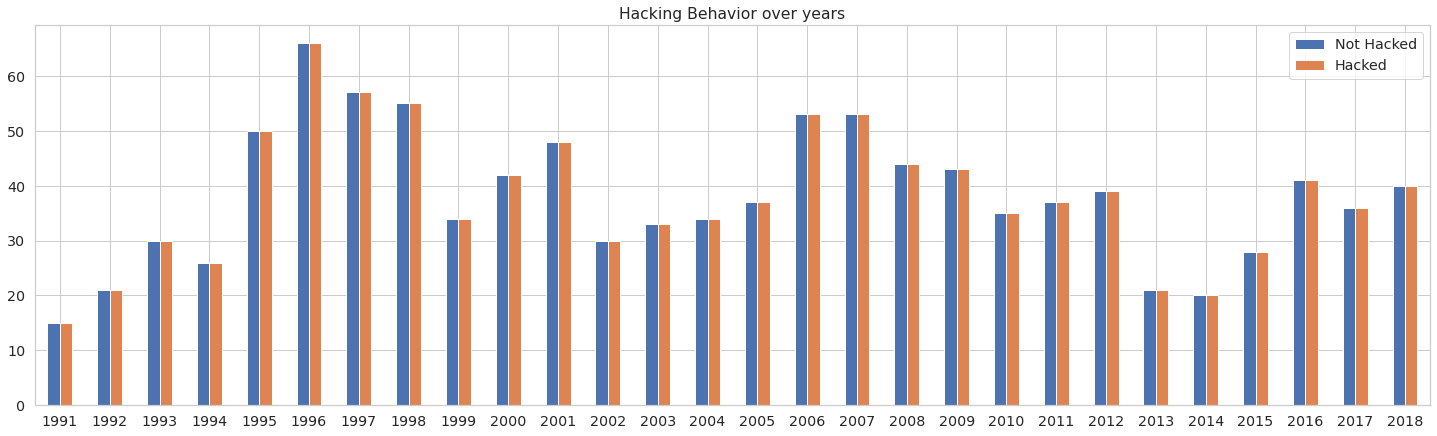

In [42]:
df = pd.DataFrame(
	{
	'Not Hacked': df_train[df_train['MULTIPLE_OFFENSE'] == 0.0]['YEAR'].value_counts(sort=False),
  'Hacked': df_train[df_train['MULTIPLE_OFFENSE'] != 1.0]['YEAR'].value_counts(sort=False)
	}
	) 
df.plot.bar(rot=0,figsize=(25, 7), title='Hacking Behavior over years')

### How is hacking behaviour spread across months of an year?



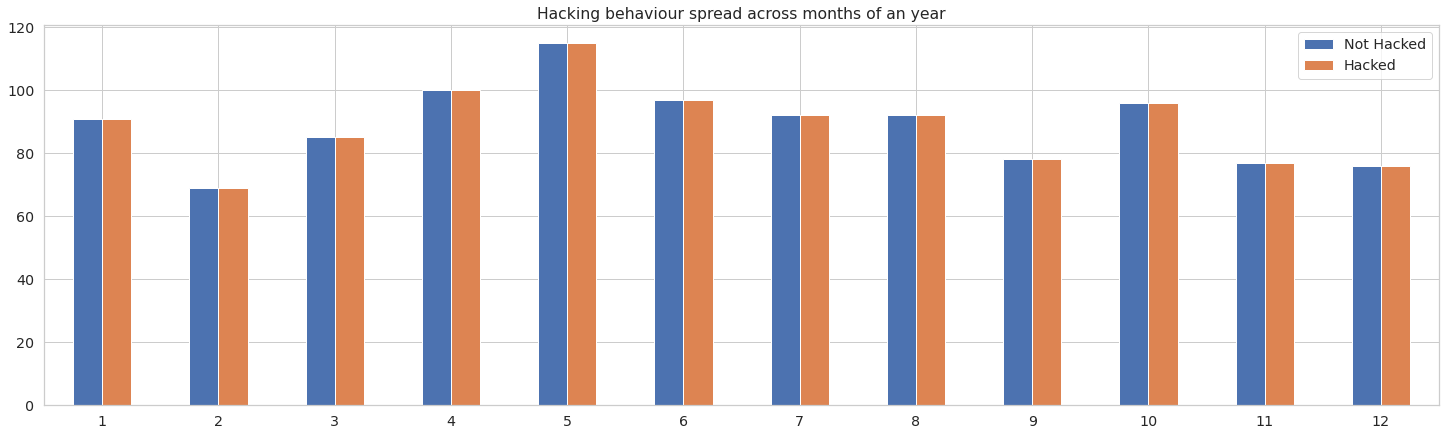

In [43]:
df = pd.DataFrame(
	{
	'Not Hacked': df_train[df_train['MULTIPLE_OFFENSE'] == 0.0]['MONTH'].value_counts(sort=False),
  'Hacked': df_train[df_train['MULTIPLE_OFFENSE'] != 1.0]['MONTH'].value_counts(sort=False)
	}
	) 
df.plot.bar(rot=0,figsize=(25, 7), title = 'Hacking behaviour spread across months of an year')

### How is hacking behaviour spread across days of month?

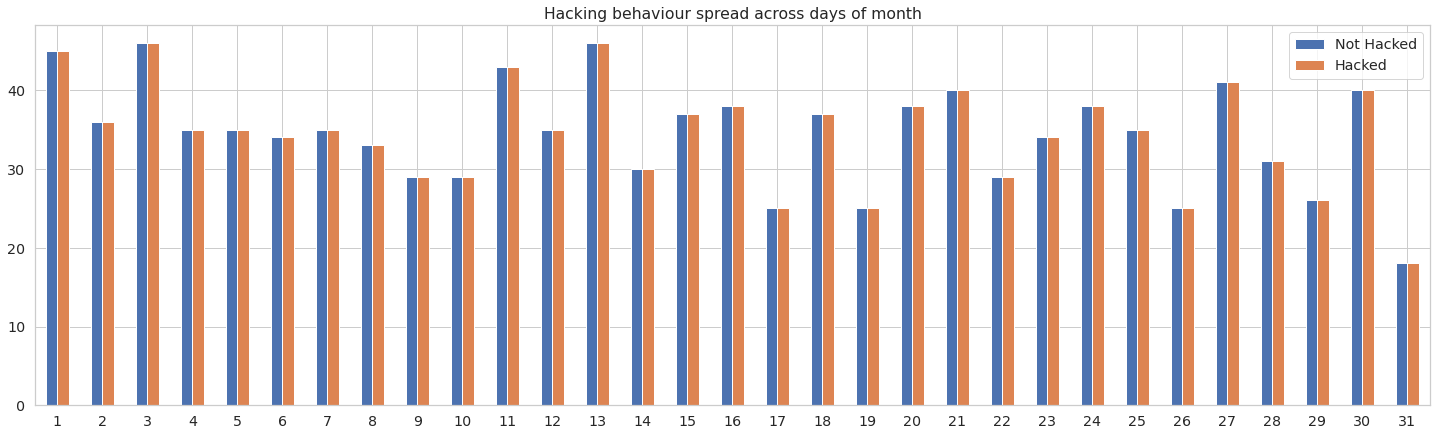

In [44]:
df = pd.DataFrame(
	{
	'Not Hacked': df_train[df_train['MULTIPLE_OFFENSE'] == 0.0]['DAY'].value_counts(sort=False),
  'Hacked': df_train[df_train['MULTIPLE_OFFENSE'] != 1.0]['DAY'].value_counts(sort=False)
	}
	)
df.plot.bar(rot=0,figsize=(25, 7), title='Hacking behaviour spread across days of month')

 <a id=section5></a>
# 5. Data preparation for model building

In [ ]:
feature_cols = list(df_train.columns)
feature_cols.remove('MULTIPLE_OFFENSE')
feature_cols

['X_1',
 'X_2',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_13',
 'X_14',
 'X_15',
 'YEAR',
 'MONTH',
 'DAY']

 <a id=section501></a>
## 5.1 Standardizing continuos independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_sd = sc.fit_transform(df_train[feature_cols])
df_test_sd = sc.transform(df_test[feature_cols])

In [ ]:
# forming dataframe after standardization
df_train_sd = pd.DataFrame(df_train_sd)
df_train_sd.columns = feature_cols

df_test_sd = pd.DataFrame(df_test_sd)
df_test_sd.columns = feature_cols
df_test_sd.index = df_test.index

 <a id=section502></a>
## 5.2 Applying SMOTING for imbalanced data

In [ ]:
X = df_train_sd[feature_cols]
y = df_train['MULTIPLE_OFFENSE']

In [ ]:
# Check distribution of target variable
y.value_counts() 

1    22788
0    1068 
Name: MULTIPLE_OFFENSE, dtype: int64

**NOTE:**

We can clearly observe there is class imbalance in target variable. Let's apply **SMOTING**

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel())

X = pd.DataFrame(X_sm,columns = X.columns)
y = pd.Series(y_sm)

In [ ]:
# Check distribution of target variable
y.value_counts()

1    22788
0    22788
dtype: int64

<a id=section503></a>
 ## 5.3 Segregating Train and Validation data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y, 
                                                    test_size=0.3)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (31903, 16)
y_train shape:  (31903,)

Test cases as below
X_test shape:  (13673, 16)
y_test shape:  (13673,)


 <a id=section6></a>
 # 6. Ensemble Modelling and Prediction
 
 Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.


 <a id=section601></a>
 ## 6.1 Logistic Regression
 
 
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool easily allows you to conduct the analysis, then in plain English interprets the output.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

For example,
1. To predict whether an email is spam (1) or (0)
1. Whether the tumor is malignant (1) or not (0)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)

logistic_train_preds = logistic.predict(X_train)
logistic_test_preds = logistic.predict(X_test)

print(confusion_matrix(y_train, logistic_train_preds))
print(confusion_matrix(y_test, logistic_test_preds))

print(classification_report(y_train, logistic_train_preds))
print(classification_report(y_test, logistic_test_preds))

[[14075  1877]
 [ 1785 14166]]
[[6050  786]
 [ 746 6091]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     15952
           1       0.88      0.89      0.89     15951

    accuracy                           0.89     31903
   macro avg       0.89      0.89      0.89     31903
weighted avg       0.89      0.89      0.89     31903

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6836
           1       0.89      0.89      0.89      6837

    accuracy                           0.89     13673
   macro avg       0.89      0.89      0.89     13673
weighted avg       0.89      0.89      0.89     13673



 <a id=section602></a>
 ## 6.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

print(confusion_matrix(y_train, rf_train_preds))
print(confusion_matrix(y_test, rf_test_preds))

print(classification_report(y_train, rf_train_preds))
print(classification_report(y_test, rf_test_preds))

[[15952     0]
 [    0 15951]]
[[6832    4]
 [  32 6805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15952
           1       1.00      1.00      1.00     15951

    accuracy                           1.00     31903
   macro avg       1.00      1.00      1.00     31903
weighted avg       1.00      1.00      1.00     31903

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6836
           1       1.00      1.00      1.00      6837

    accuracy                           1.00     13673
   macro avg       1.00      1.00      1.00     13673
weighted avg       1.00      1.00      1.00     13673



 <a id=section603></a>
## 6.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,accuracy_score,f1_score

train_performance={}
test_performance={}
 
for k in range(1,25,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_temp.fit(X_train,y_train)
    k_train_preds=knn_temp.predict(X_train)
    k_test_preds=knn_temp.predict(X_test)
    train_performance[k]=recall_score(y_train,k_train_preds, average='weighted')
    test_performance[k]=recall_score(y_test,k_test_preds, average='weighted')

In [ ]:
keys = test_performance.keys()
train_values = train_performance.values()
test_values = test_performance.values()

In [ ]:
perf=pd.DataFrame()
perf['k']= keys
perf['train_performance']= train_values
perf['test_performance']= test_values

In [ ]:
perf.sort_values(by='test_performance', ascending=False, axis=0)

,k,train_performance,test_performance
0,1,1.0,0.973817
1,3,1.0,0.958019
2,5,1.0,0.946903
3,7,1.0,0.937029
4,9,1.0,0.929569
5,11,1.0,0.923645
6,13,1.0,0.918379
7,15,1.0,0.913333
8,17,1.0,0.908798
9,19,1.0,0.907482


In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,weights='distance')
knn.fit(X_train,y_train)

knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print(confusion_matrix(y_train, knn_train_preds))
print(confusion_matrix(y_test, knn_test_preds))

print(classification_report(y_train, knn_train_preds))
print(classification_report(y_test, knn_test_preds))

[[15952     0]
 [    0 15951]]
[[6834    2]
 [ 356 6481]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15952
           1       1.00      1.00      1.00     15951

    accuracy                           1.00     31903
   macro avg       1.00      1.00      1.00     31903
weighted avg       1.00      1.00      1.00     31903

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6836
           1       1.00      0.95      0.97      6837

    accuracy                           0.97     13673
   macro avg       0.98      0.97      0.97     13673
weighted avg       0.98      0.97      0.97     13673



 <a id=section604></a>
## 6.4 Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes classification
gnb = GaussianNB(priors=None)

# Train classifier
gnb.fit(X_train,y_train)

gnb_train_preds = gnb.predict(X_train)
gnb_test_preds = gnb.predict(X_test)

print(confusion_matrix(y_train, gnb_train_preds))
print(confusion_matrix(y_test, gnb_test_preds))

print(classification_report(y_train, gnb_train_preds))
print(classification_report(y_test, gnb_test_preds))

[[12139  3813]
 [ 1867 14084]]
[[5223 1613]
 [ 797 6040]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81     15952
           1       0.79      0.88      0.83     15951

    accuracy                           0.82     31903
   macro avg       0.83      0.82      0.82     31903
weighted avg       0.83      0.82      0.82     31903

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      6836
           1       0.79      0.88      0.83      6837

    accuracy                           0.82     13673
   macro avg       0.83      0.82      0.82     13673
weighted avg       0.83      0.82      0.82     13673



 <a id=section605></a>
## 6.5 SVM

In [ ]:
# SVM
from sklearn import svm
model_svm = svm.SVC(probability=True, kernel='rbf', degree = 3)
model_svm.fit(X_train, y_train)

model_svm_train_preds = model_svm.predict(X_train)
model_svm_test_preds = model_svm.predict(X_test)

print(confusion_matrix(y_train, model_svm_train_preds))
print(confusion_matrix(y_test, model_svm_test_preds))

print(classification_report(y_train, model_svm_train_preds))
print(classification_report(y_test, model_svm_test_preds))

[[15820   132]
 [  990 14961]]
[[6762   74]
 [ 456 6381]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15952
           1       0.99      0.94      0.96     15951

    accuracy                           0.96     31903
   macro avg       0.97      0.96      0.96     31903
weighted avg       0.97      0.96      0.96     31903

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6836
           1       0.99      0.93      0.96      6837

    accuracy                           0.96     13673
   macro avg       0.96      0.96      0.96     13673
weighted avg       0.96      0.96      0.96     13673



 <a id=section7></a>
# 7. Conclusion

**NOTE: **

From above models, it is clearly evident that **Random Forest has best Recall score** for both train and validation data. Let's use it for final model prediction.

In [ ]:
final_predictions = rf.predict(df_test_sd)

In [ ]:
final_preds = pd.DataFrame({'MULTIPLE_OFFENSE':final_predictions})
final_preds.index = df_test_sd.index;
final_preds.to_csv('final_preds.csv')